# SVM code

##  Required Packages

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

from sklearn import svm 

## 1. Binary  Classification

#### Data

이번에 사용할 데이터는 svm 이론을 쉽게 이해하기 위해 sklearn 데이터셋에서 random으로 점을 찍어 임의로 예쁜 데이터를 만들어 사용할 것이다.

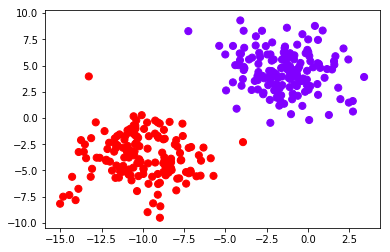

In [2]:
from sklearn.datasets import make_blobs


x, y = make_blobs(n_samples=300, centers=2,
                  random_state=1, cluster_std=2)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

#### Train set 과 Test set 나누기

In [3]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0)

#### 모델 만들기

In [4]:
svm_linear=svm.SVC(C=1000, kernel='linear').fit(x_train,y_train)

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

위의 사이트는 scikit-learn 홈페이지에서 svm 함수를 설명하는 부분이다.

SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)[source]

아직 커널과 soft SVM을 안배워서 tol, max_iter 정도만 알면 된다.

#### 결과확인

In [5]:
svm_linear.support_                # support vector의 index들

array([ 47, 133, 177])

In [6]:
svm_linear.support_vectors_        # support vectors

array([[ -4.32346324,   0.88511275],
       [-13.27261169,   3.96385686],
       [ -3.93599828,  -2.3041793 ]])

In [7]:
svm_linear.n_support_              # 각 클레스에 속한 support vectors 수

array([1, 2])

In [8]:
svm_linear.predict(x_test)         # 새로운 데이터 예측

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0])

In [9]:
svm_linear.score(x_test,y_test)    #모델 정확도

1.0

In [10]:
svm_linear.coef_

array([[-0.45821289, -0.68253546]])

In [11]:
svm_linear.intercept_

array([-2.37645474])

#### 모델 확인

In [12]:

w_1=svm_linear.coef_[0][0]
w_2=svm_linear.coef_[0][1]
b=svm_linear.intercept_
xx=np.linspace(-15,2.5,10)

f=(-b-w_1*xx)/w_2       # w_1*x1-+w2*x2+b=0  
f_1=(-b-1-w_1*xx)/w_2   # w_1*x1-+w2*x2+b=-1  
f_2=(-b+1-w_1*xx)/w_2   # w_1*x1-+w2*x2+b=1


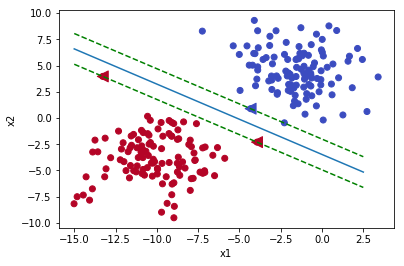

In [13]:

#그레프 그리기
plt.scatter(x_train[:,0],x_train[:,1] ,c=y_train, cmap=plt.cm.coolwarm)

plt.scatter(svm_linear.support_vectors_[:,0],svm_linear.support_vectors_[:,1],s=120, marker='<',c=y_train[svm_linear.support_], cmap=plt.cm.coolwarm)
#plt.scatter(x_test[:,0],x_test[:,1],c=y_test, marker=">", cmap=plt.cm.coolwarm)

plt.plot(xx,f)
plt.plot(xx,f_1,ls='dashed', c='g')
plt.plot(xx,f_2, ls='dashed', c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

##  2. Kernels

#### Data

이번 데이터는 선형으로 분리 불가능한 데이터를 가져와서 커널을 이용하여 분리한다.

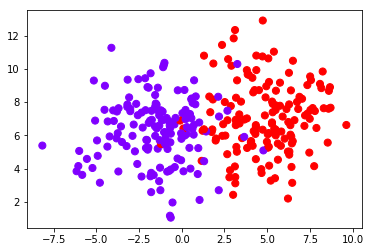

In [69]:
x, y = make_blobs(n_samples=300, centers=2,
                  random_state=27, cluster_std=2)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

#### Train set 과 Test set 나누기

In [70]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0)

#### 모델 만들기

먼저 linear kernel을 이용하여 정확도를 확인해보자

In [71]:
svm_linear=svm.SVC(C=1000, kernel='linear').fit(x_train,y_train)

In [72]:
svm_linear.score(x_test,y_test)

0.97333333333333338

정확도가 57%로 그다지 높지 않다. 다음으로는 Gaussian Kernel을 이용해서 분류해보자.

In [ ]:
svm_rbf=svm.SVC(C=1000, kernel='sigmoid').fit(x_train,y_train)

In [ ]:
svm_rbf.score(x_test,y_test)